# Lab 2: visualizing variation

# 2. Loading packages

As for last week’s lab, we’ll load some packages that will help us with our goal of creating some plots this week. We'll also load in the dataset we'll be working with.

In [1]:
# Packages to help tidy our data
library (tidyverse)
# Packages for the graphical analysis section
library (repr)
# packages used for working with/formatting dates in R
library (lubridate)
library (zoo)


Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘tibble’”
Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   1.0.1
✔ tibble  3.0.1     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



A

In [2]:
covid_demographics.df <- 
read_csv("Ontario_age_and_sex_COVID-19_data_merged_filtered.csv") 
str(covid_demographics.df)
tail(covid_demographics.df)
head(covid_demographics.df, n=50)


Parsed with column specification:
cols(
  .default = col_double(),
  period = col_character(),
  from_date = col_character(),
  to_date = col_character(),
  geographic_area = col_character(),
  age_group = col_character()
)

See spec(...) for full column specifications.



spc_tbl_ [170 × 23] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ period                      : chr [1:170] "cumulative COVID-19 cases" "cumulative COVID-19 cases" "cumulative COVID-19 cases" "cumulative COVID-19 cases" ...
 $ from_date                   : chr [1:170] "15-Jan-20" "15-Jan-20" "15-Jan-20" "15-Jan-20" ...
 $ to_date                     : chr [1:170] "22-Oct-22" "22-Oct-22" "22-Oct-22" "22-Oct-22" ...
 $ geographic_area             : chr [1:170] "Algoma" "Algoma" "Algoma" "Algoma" ...
 $ age_group                   : chr [1:170] "0 to 19" "20 to 39" "40 to 59" "60 to 79" ...
 $ male_cases                  : num [1:170] 615 1207 1068 936 466 ...
 $ male_rate                   : num [1:170] 5460 8846 7456 6011 14308 ...
 $ female_cases                : num [1:170] 706 1922 1736 1021 701 ...
 $ female_rate                 : num [1:170] 6340 14992 11564 6133 15746 ...
 $ total_cases                 : num [1:170] 1340 3205 2875 1992 1172 ...
 $ total_rate                  : num [1

period,from_date,to_date,geographic_area,age_group,male_cases,male_rate,female_cases,female_rate,total_cases,⋯,female_hospitalizations,female_hospitalizations_rate,total_hospitalizations_count,total_hospitalizations_rate,male_deaths,male_death_rate,female_deaths,female_death_rate,total_deaths,total_deaths_rate
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cumulative COVID-19 cases,15-Jan-20,22-Oct-22,Toronto,80+,8835,16673.3,14252,16606.1,23165,⋯,2568,2992.20000,4979,3586.80000,1228,2317.5,1416,1649.9,2669,1922.7
cumulative COVID-19 cases,15-Jan-20,22-Oct-22,Southwestern,0 to 19,1251,4625.1,1256,4801.5,2508,⋯,18,84.53333,41,89.73333,0,0.0,0,0.0,0,0.0
cumulative COVID-19 cases,15-Jan-20,22-Oct-22,Southwestern,20 to 39,1846,6820.1,3264,12941.6,5110,⋯,22,87.20000,48,91.80000,2,7.4,0,0.0,2,3.8
cumulative COVID-19 cases,15-Jan-20,22-Oct-22,Southwestern,40 to 59,1760,6159.2,2841,10022.2,4604,⋯,68,239.90000,143,251.20000,8,28.0,9,31.7,17,29.9
cumulative COVID-19 cases,15-Jan-20,22-Oct-22,Southwestern,60 to 79,1369,6054.6,1415,5797.5,2785,⋯,132,540.80000,336,714.60000,44,194.6,32,131.1,76,161.6
cumulative COVID-19 cases,15-Jan-20,22-Oct-22,Southwestern,80+,589,13911.2,989,15964.5,1580,⋯,116,1872.50000,249,2387.60000,43,1015.6,55,887.8,98,939.7


period,from_date,to_date,geographic_area,age_group,male_cases,male_rate,female_cases,female_rate,total_cases,⋯,female_hospitalizations,female_hospitalizations_rate,total_hospitalizations_count,total_hospitalizations_rate,male_deaths,male_death_rate,female_deaths,female_death_rate,total_deaths,total_deaths_rate
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cumulative COVID-19 cases,15-Jan-20,22-Oct-22,Algoma,0 to 19,615,5459.600,706,6339.833,1340,⋯,13,146.73333,27,145.76667,0,0.0,0,0.0,0,0.0
cumulative COVID-19 cases,15-Jan-20,22-Oct-22,Algoma,20 to 39,1207,8846.400,1922,14992.200,3205,⋯,16,124.80000,40,151.10000,1,7.3,1,7.8,2,7.6
cumulative COVID-19 cases,15-Jan-20,22-Oct-22,Algoma,40 to 59,1068,7455.500,1736,11564.100,2875,⋯,33,219.80000,76,259.10000,5,34.9,4,26.6,9,30.7
cumulative COVID-19 cases,15-Jan-20,22-Oct-22,Algoma,60 to 79,936,6011.200,1021,6132.900,1992,⋯,73,438.50000,175,543.20000,17,109.2,12,72.1,29,90.0
cumulative COVID-19 cases,15-Jan-20,22-Oct-22,Algoma,80+,466,14307.600,701,15745.700,1172,⋯,70,1572.30000,155,2010.60000,18,552.7,14,314.5,32,415.1
cumulative COVID-19 cases,15-Jan-20,22-Oct-22,Brant County,0 to 19,1183,6331.400,1156,6344.267,2353,⋯,18,133.96667,36,129.10000,0,0.0,0,0.0,0,0.0
cumulative COVID-19 cases,15-Jan-20,22-Oct-22,Brant County,20 to 39,1728,8552.300,2748,14197.100,4513,⋯,24,124.00000,49,123.90000,1,4.9,1,5.2,2,5.1
cumulative COVID-19 cases,15-Jan-20,22-Oct-22,Brant County,40 to 59,1484,7431.900,2296,11533.100,3793,⋯,52,261.20000,113,283.40000,4,20.0,2,10.0,6,15.0
cumulative COVID-19 cases,15-Jan-20,22-Oct-22,Brant County,60 to 79,862,5760.500,999,6078.900,1868,⋯,122,742.40000,260,828.10000,21,140.3,13,79.1,34,108.3


# 5. Reformatting our dataset

We are going to first use some “regular expressions” to replace some characters in our data frame with other characters, for instance, we’ll replace spaces with underscores in the column names. We’ll also use a similar “regex” mechanism to filter our dataset. The chain operator (%>%) allows the output of one operation to feed into the next.

In [4]:
# Format our dataset to focus on total_cases and total_deaths
covid_demographics_total.df <-
covid_demographics.df %>%
# Pare down the dataset to just total_cases, total_deaths, and
# total_hospitalizations
select(from_date, to_date, geographic_area, age_group,
total_cases, total_deaths, total_hospitalizations_count) %>%
# Convert the age_group into a “factor”
mutate(age_group = factor(age_group)) %>%
rename(public_health_unit = geographic_area) %>%
# Group the data so you can “summarize” in the next steps
group_by(public_health_unit) %>%
# Generate percent cases for each age group within a PHU
mutate(percent_cases = total_cases/sum(total_cases),
# Generate percent deaths for each age group within a PHU
percent_deaths = total_deaths/sum(total_deaths),
# Generate % hospitalizations for each age group within a PHU
percent_hospitalizations =
total_hospitalizations_count/sum(total_hospitalizations_count))
# Take a look at the different age demographics
levels(covid_demographics_total.df$age_group)


[1] "0 to 19"  "20 to 39" "40 to 59" "60 to 79" "80+"

# 6. Plotting the distribution of cases by age group

Now we can plot what the distribution of our data looks like, based on the age bands indicated above, from each of Ontario’s 34 public health units (PHUs). 

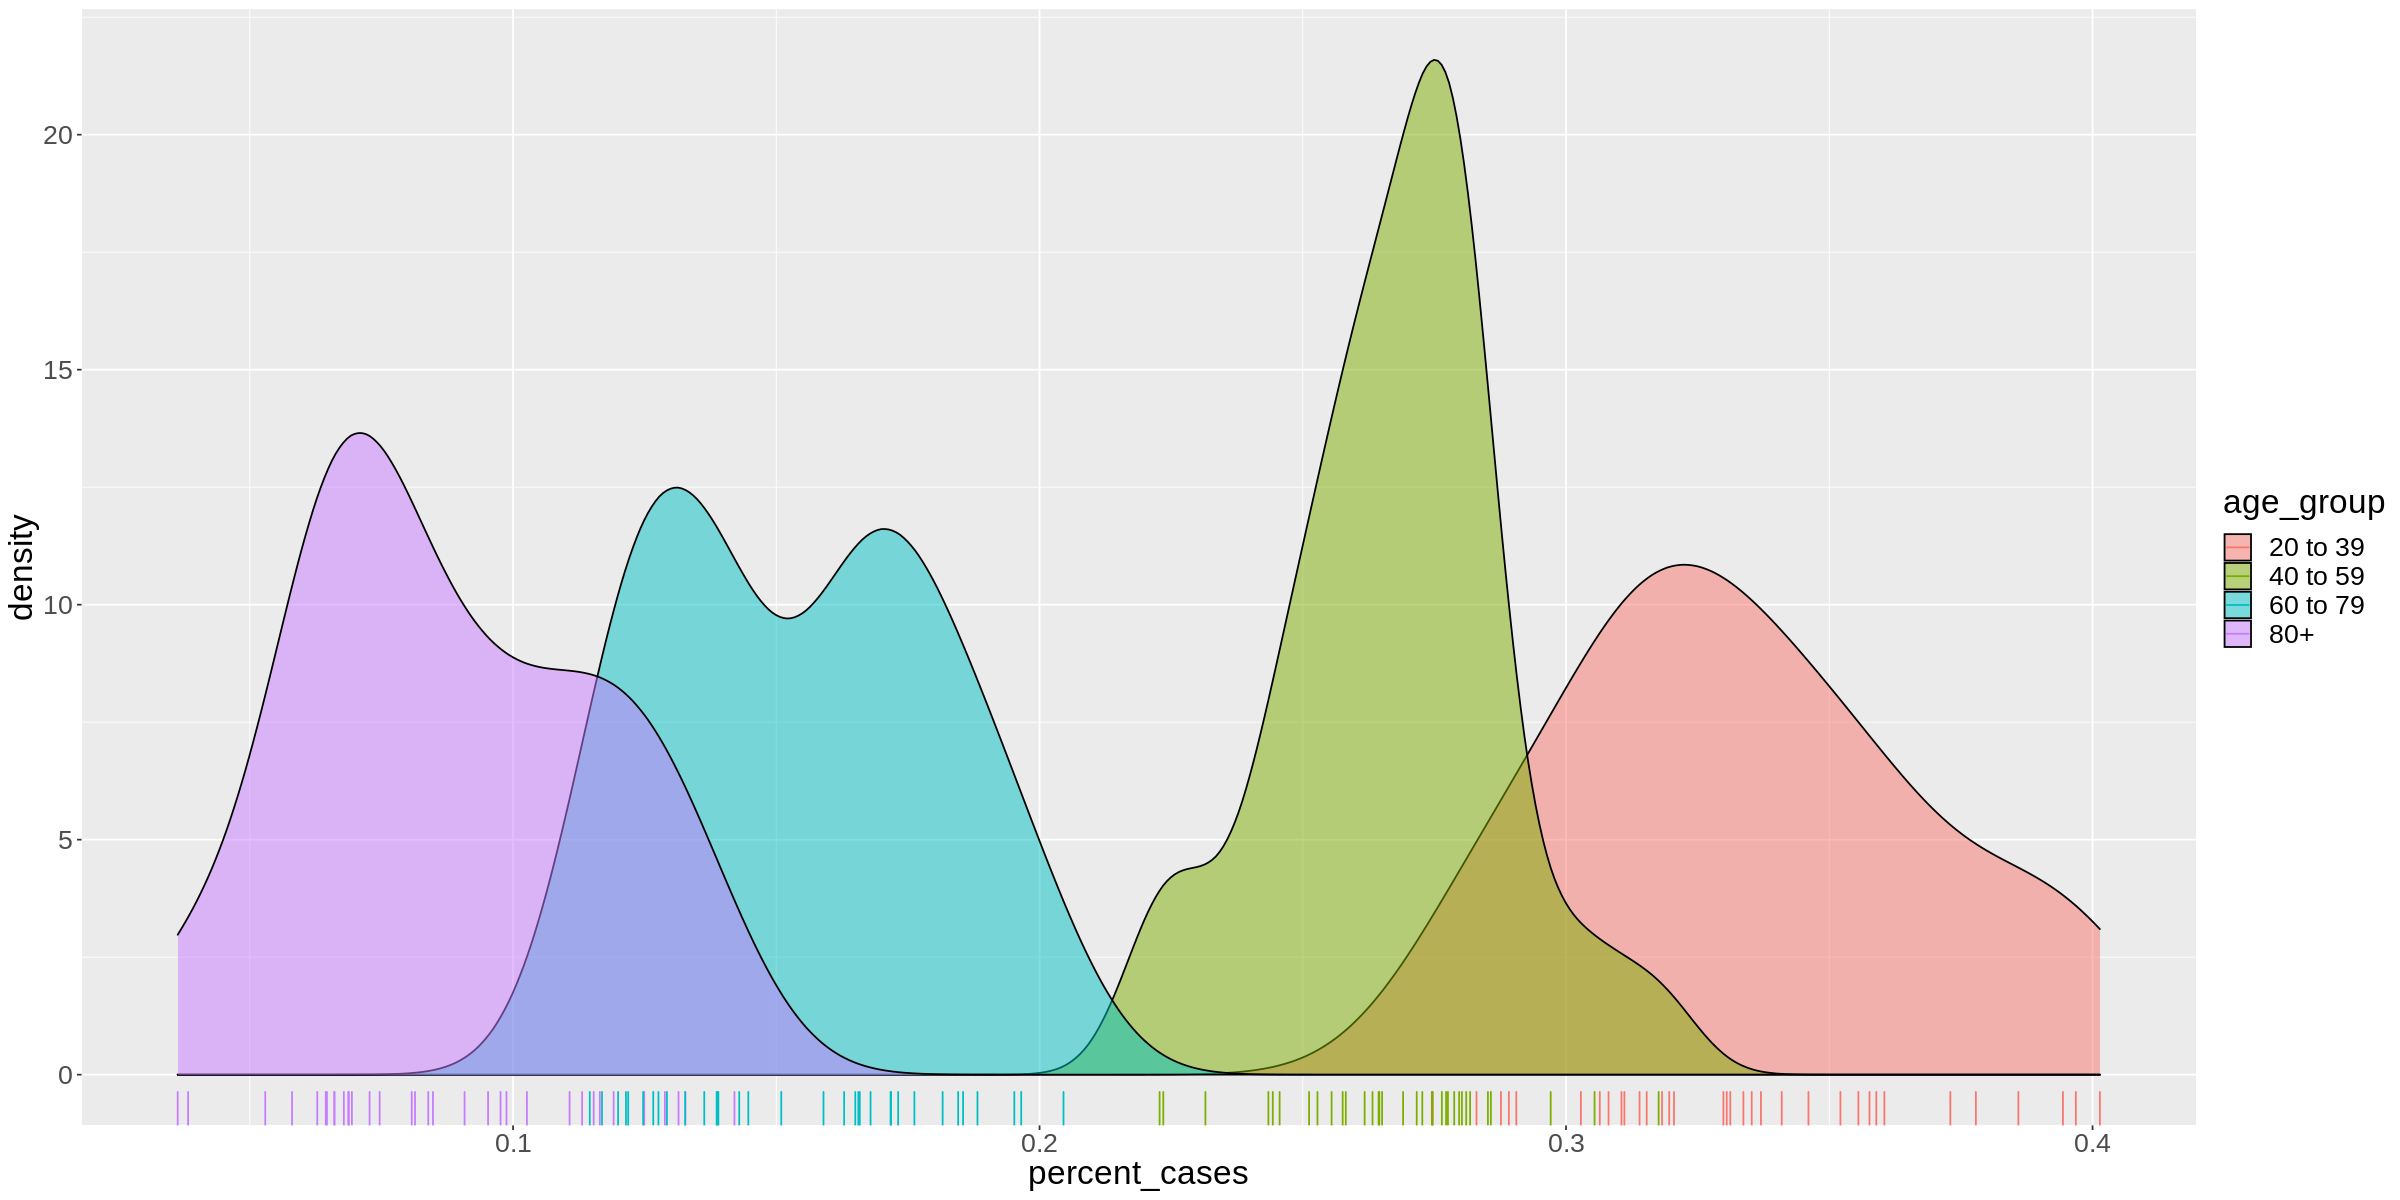

In [5]:
# Adjust our plot window size according to the expected output
options(repr.plot.width=20, repr.plot.height=10)
covid_demographics_total.df %>%
# Filter for some of our age groups
filter(age_group %in% c("20 to 39","40 to 59", "60 to 79", "80+")) %>%
# 1. Data
ggplot(.) +
# 2. Aesthetics
aes(x = percent_cases, fill = age_group) +
theme(text = element_text(size = 20)) + # set text size
# 4. Geoms
geom_density(alpha = 0.5) + # generate kernel density estimate
geom_rug(aes(colour = age_group)) 
# confirm our data values with a geom_rug


# 7. Faceted plots

If we have more than 3 or 4 categories, we might want to use the powerful facet_wrap function of ggplot. This creates small multiples of graphs, with each dataset plotted separately on its own miniature graph. One important data visualization aspect to keep in mind is to use the same scale for each graph. This way, a viewer only has to understand what the x and y coordinates are once and then at a glance can easily see where the maxima and minima are for a given dataset. But this might not always be useful...

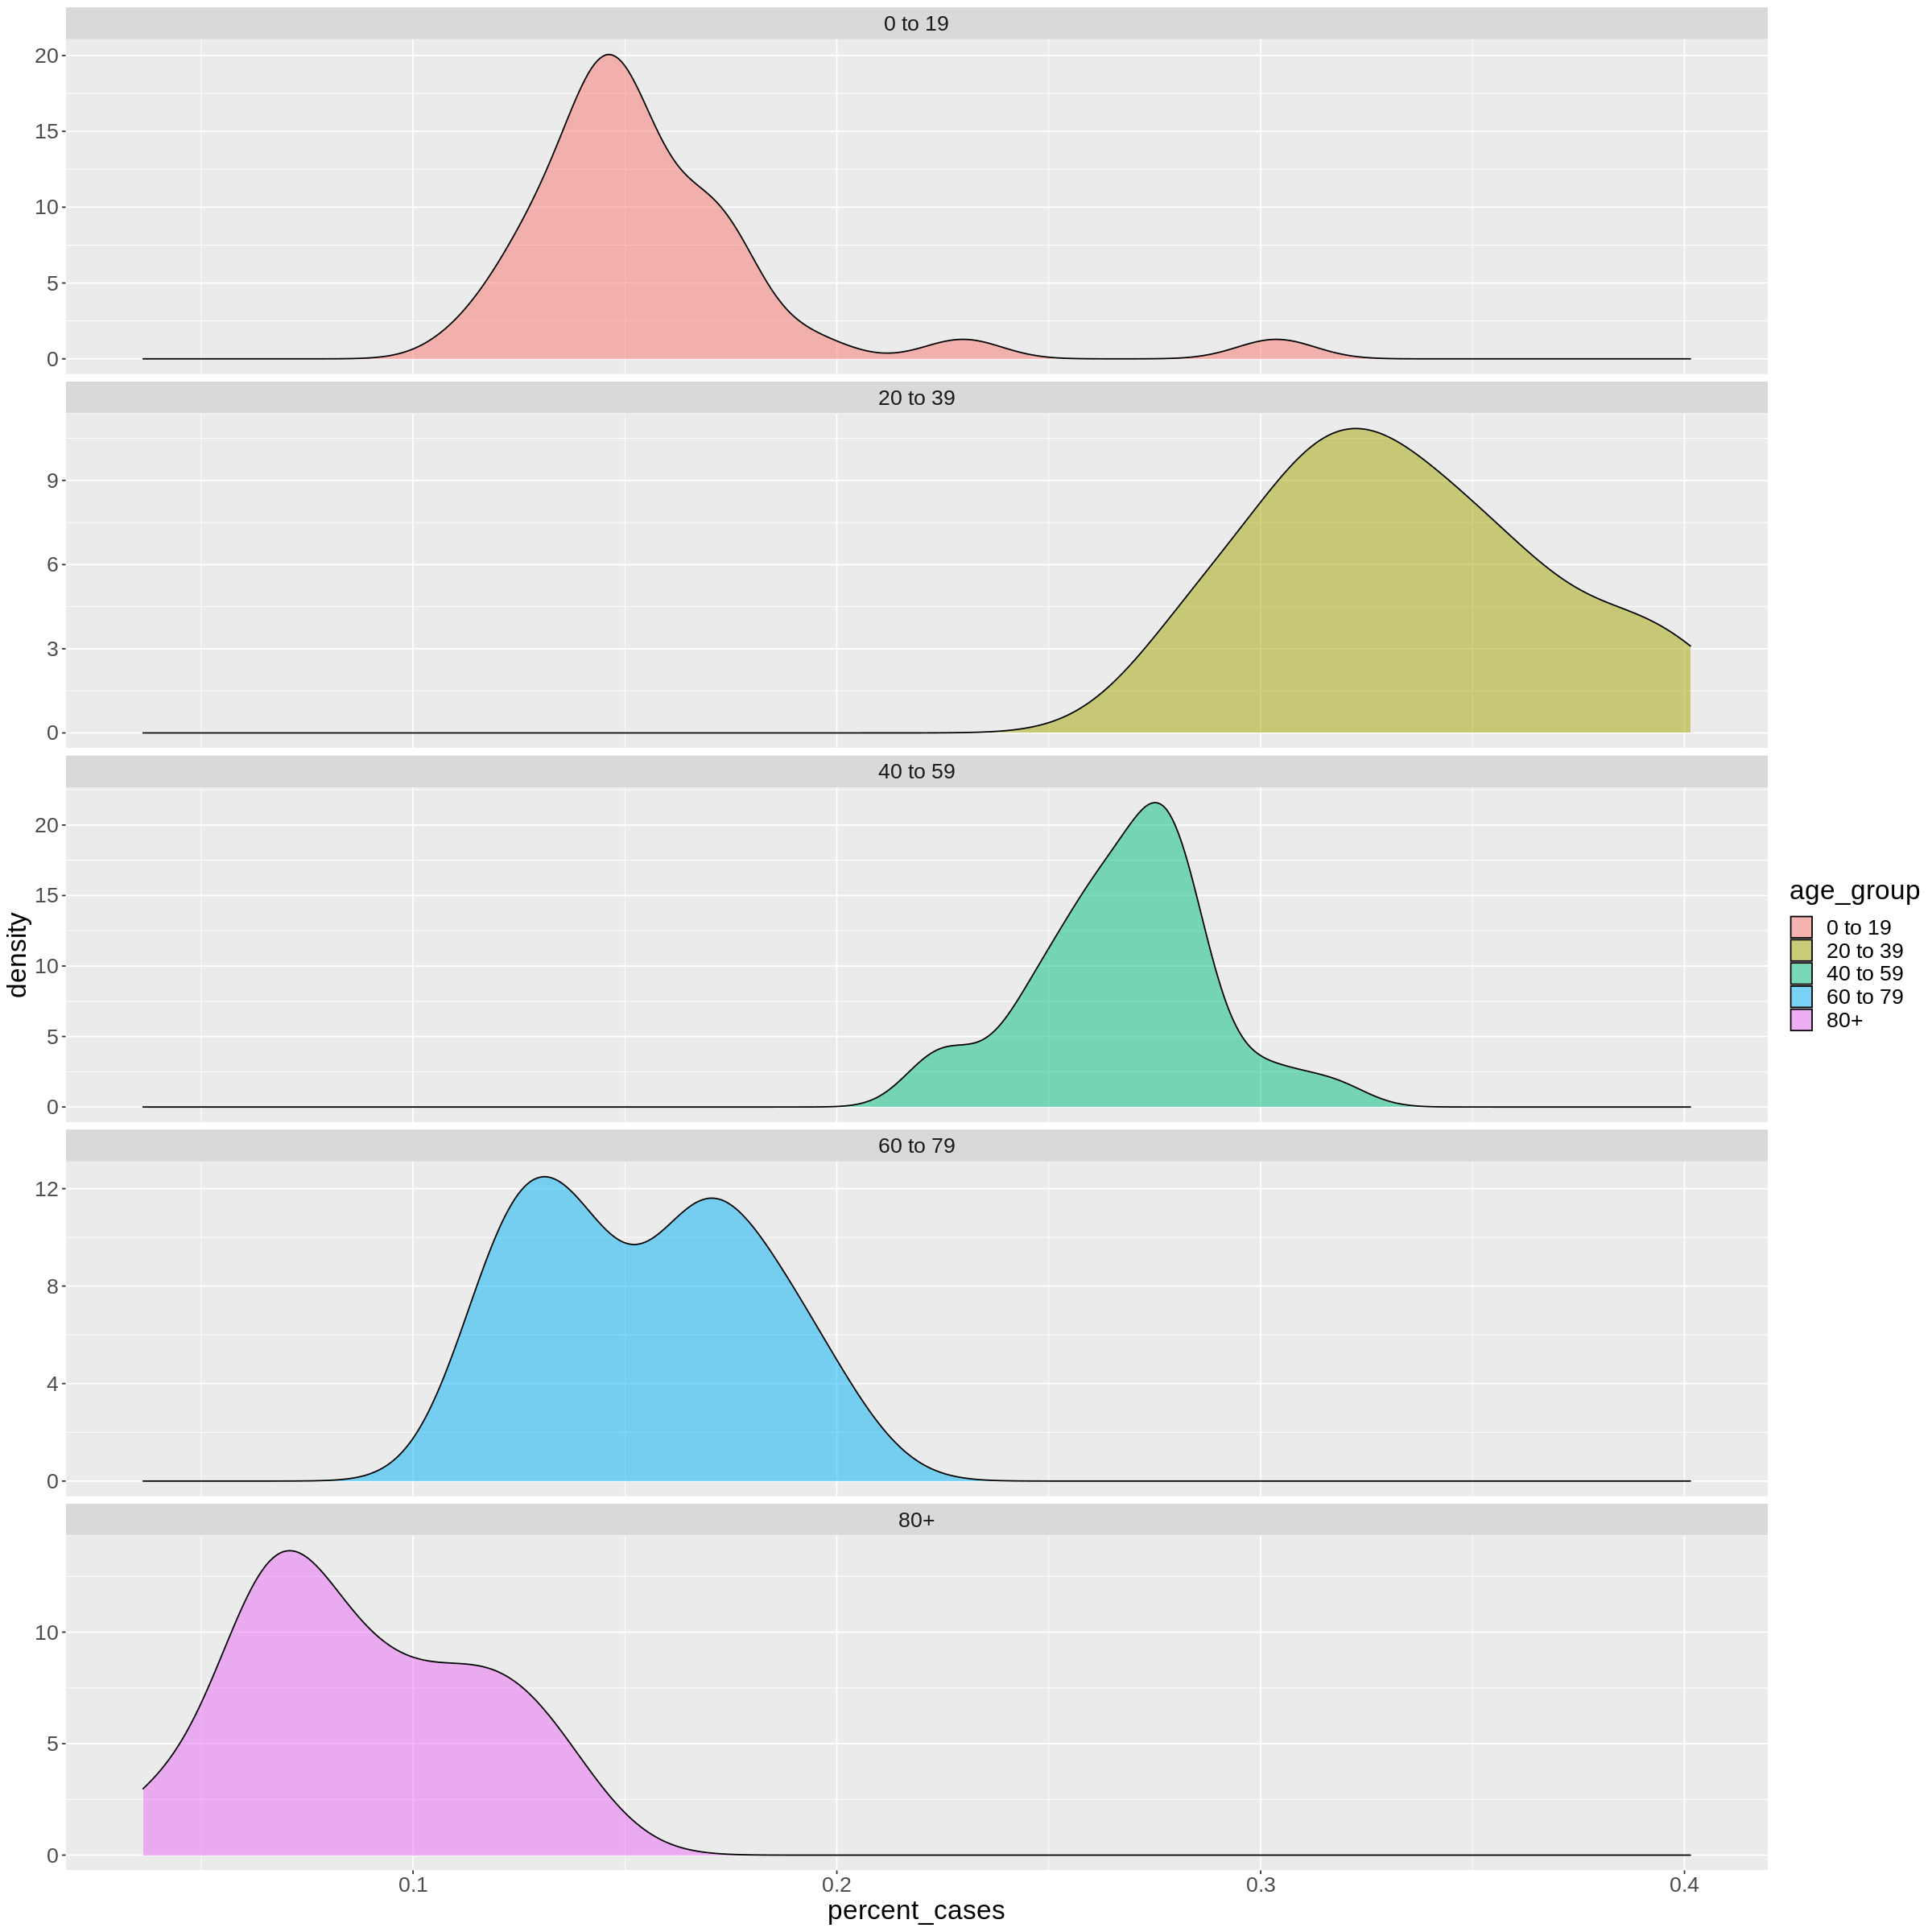

In [6]:
# Instantiate ggplot object
# Adjust our plot window size according to the expected output
options(repr.plot.width=20, repr.plot.height=20)
covid_demographics_total.df %>%
# Select for just the important columns
select(public_health_unit, age_group, percent_cases, percent_deaths) %>%
# 1. Data
ggplot(.) +
# 2. Aesthetics
aes(x = percent_cases, fill = age_group) +
theme (text = element_text(size = 20)) + # set text size
# 4. Geoms
geom_density(alpha = 0.5) +
# 6. Facet
facet_wrap(~age_group, ncol = 1, scales = "free_y" ) 
# try with scales = "free_y" as a parameter


# 8. Viewing the data as boxplots with jittered data points

We’ll explore plotting both Covid-19 cases and deaths in the same figure using boxplots, along with showing all data points, added as jitter plots overlaid on the boxplots. 

Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 14 rows containing missing values (geom_point).”


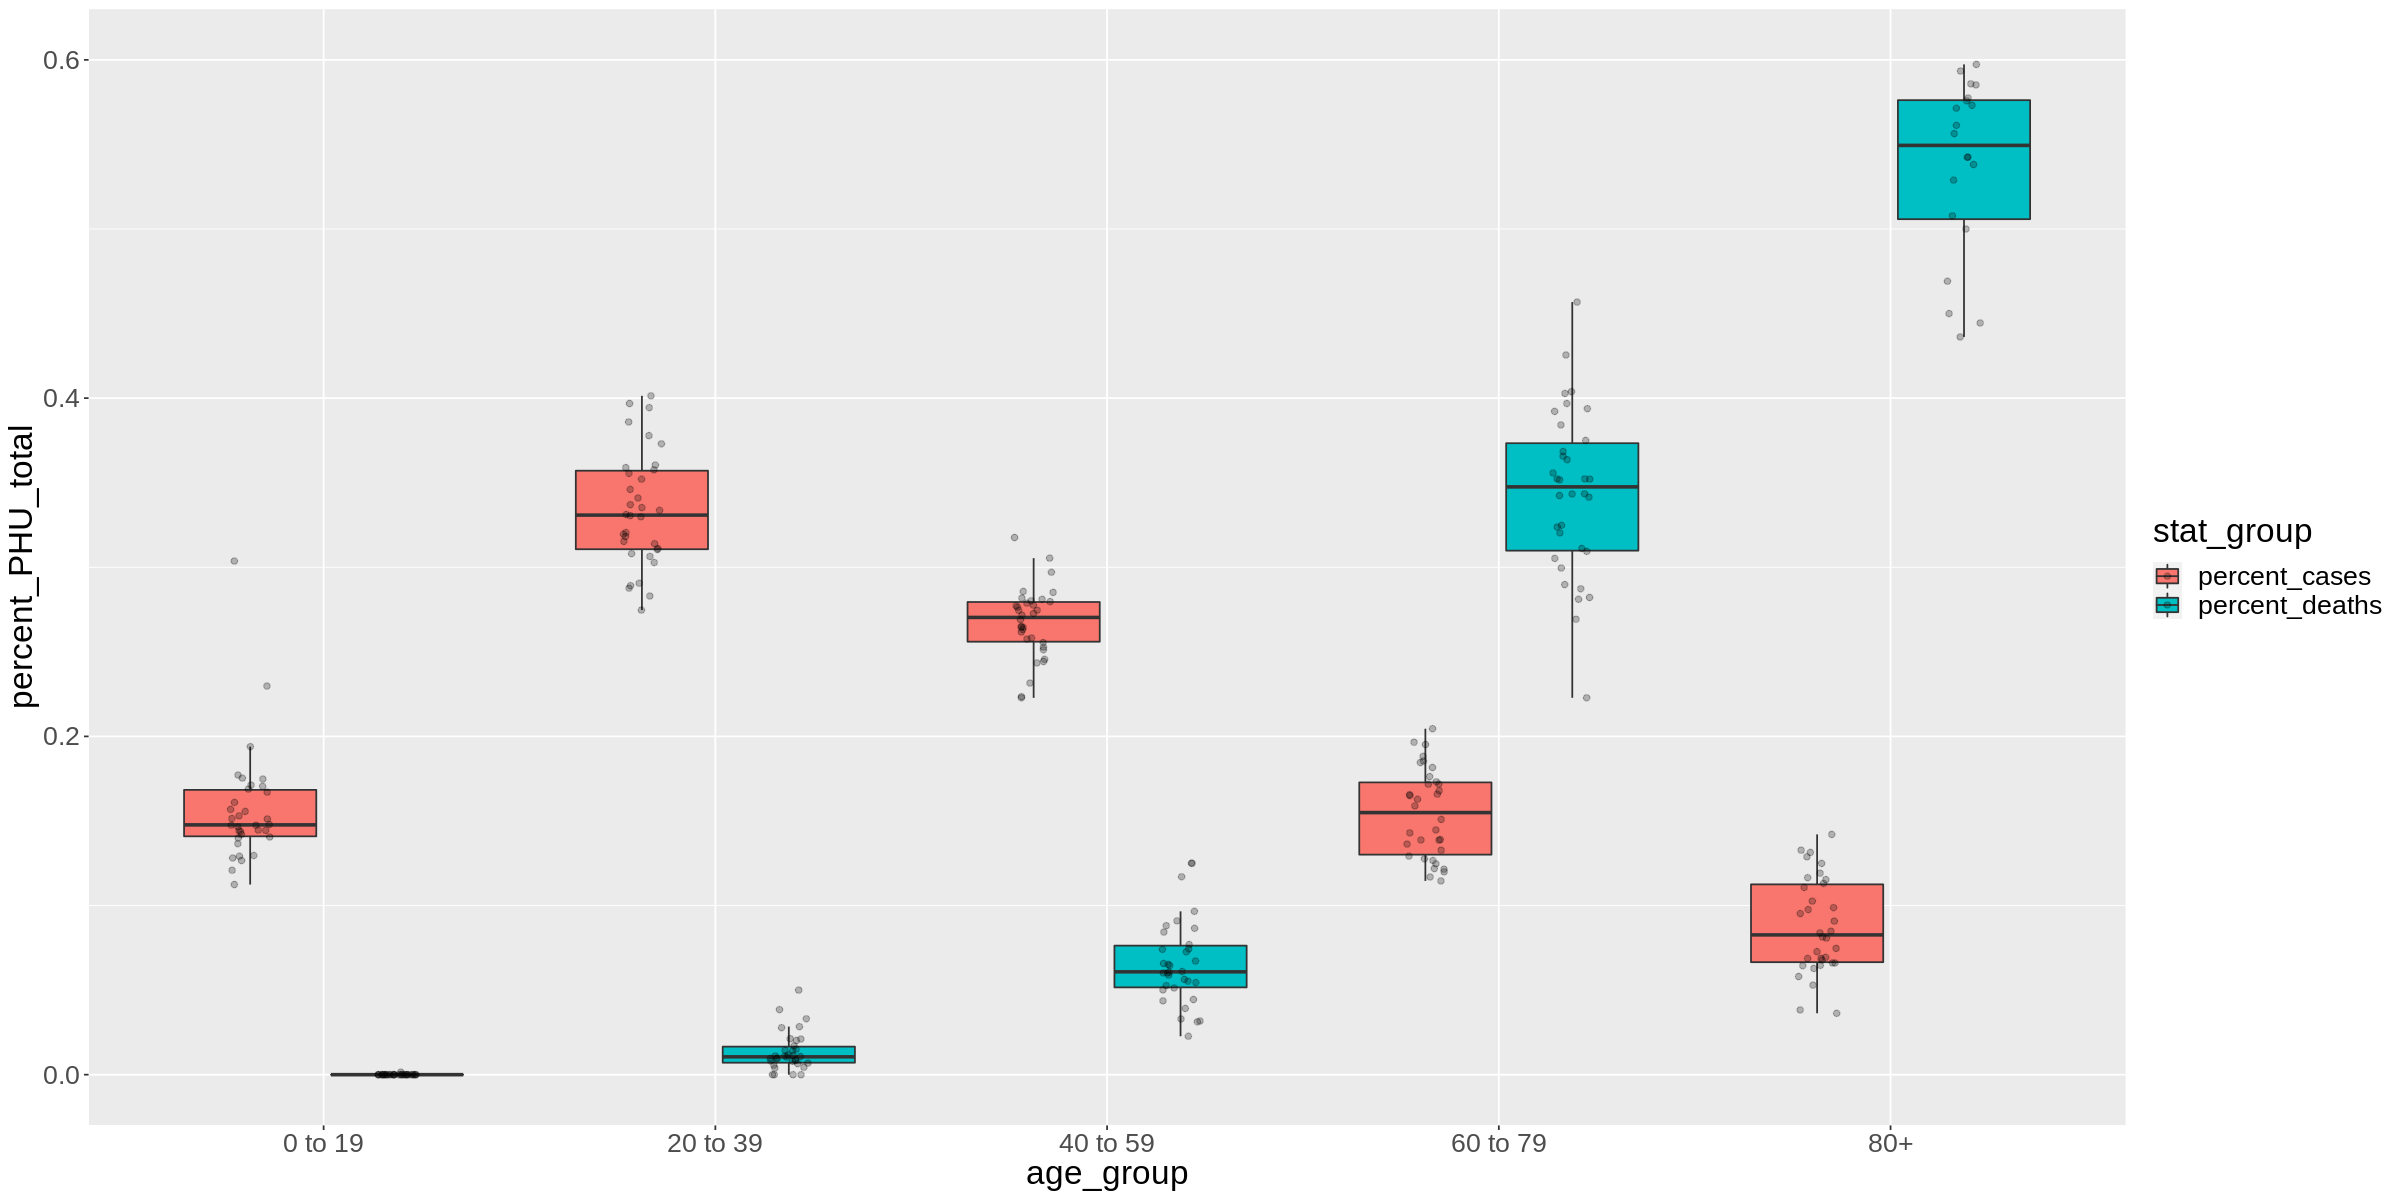

In [7]:
# Adjust our plot window size according to the expected output
options(repr.plot.width=20, repr.plot.height=10)
covid_demographics_total.df %>%
# Select for just the important columns
select(public_health_unit, age_group, percent_cases, percent_deaths) %>%
# Pivot the modified table to capture the "stat_group" of 
# percent_cases vs percent_deaths
pivot_longer(cols=c(3:4), names_to = "stat_group", values_to = "percent_PHU_total") %>%
# Plot the data as a grouped boxplot
# 1. Data
ggplot(.) +
# 2. Aesthetics
aes(x=age_group, y = percent_PHU_total, fill = stat_group) +
theme(text = element_text(size = 20)) + # set text size
theme(legend.position = "right") +
scale_y_continuous(limits = c(0, 0.6)) + # Set the y-axis limit
# 4. Geoms
geom_boxplot(outlier.shape=NA, notch = FALSE) + 
# Add the boxplot geom
geom_point(position=position_jitterdodge(jitter.width = 0.1, jitter.height = 0, dodge.width = 0.75, seed = NA), alpha = 0.25) # Add data points for comparison


# 9. Violin plots

Box plots can represent the summary information of the distribution of data in a dataset but are always a visual representation of an even distribution. There are not enough parameters supplied to represent anything more complex! Violin plots are not limited in that respect. Despite some of their visual caveats, violin plots can help in detecting multi-modal data. It is recommended to use violin plots when you have at least 30 data points.

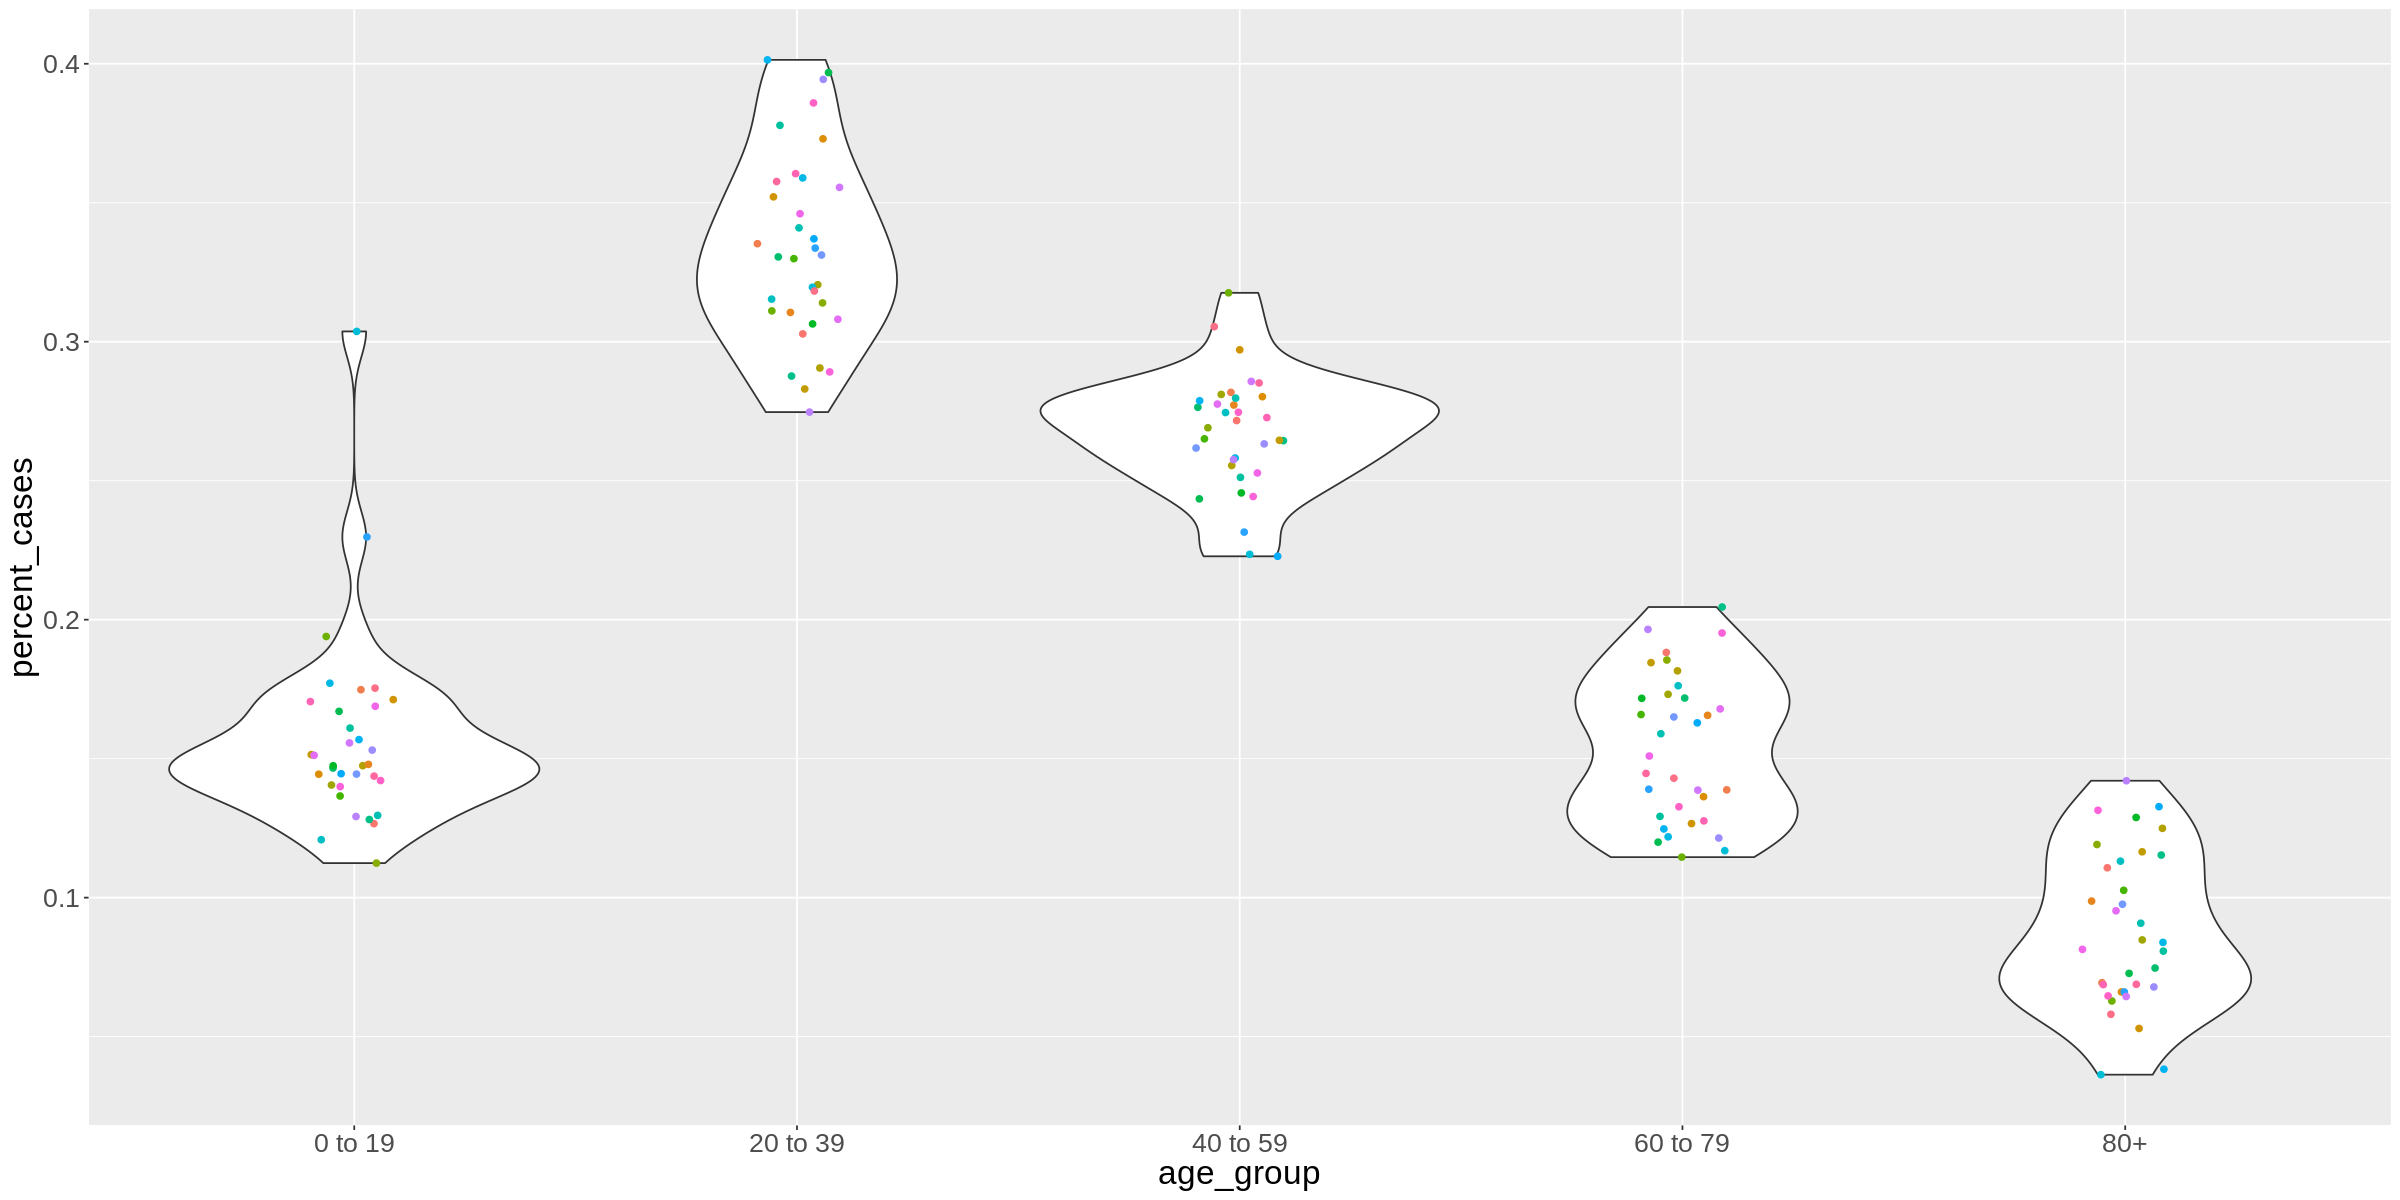

In [8]:
# Adjust our plot window size according to the expected output
options(repr.plot.width=20, repr.plot.height=10)
# Generate a basic box plot with outliers present
covid_demographics_total.df %>%
# 1. Data
ggplot(.) +
# 2. Aesthetics
aes(x=age_group, y = percent_cases) +
theme(text = element_text(size = 20)) + # set text size
theme(legend.position = "none") +
# 4. Geoms
geom_violin() + # Add the boxplot geom
geom_jitter(aes(colour = public_health_unit), width = 0.1, height = 0)
